# Physics 280 Final Project: Finite Square Well

## Abstract
Thi final project was all about finding the energy eigenstates and values of a Finite square well using root finding methods. After solving the Schrodinger's equation, one would discover that there are both Symmetric and Asymmetric cases of a finite square well and these cases were accounted for in this project. Energy Eigenvalues gotten from this root finding method were compared to results gotten from solving the transcedental equations. Solving for a finite square well with $V_0$ = -100, seven energy eigenstates and values were found comprising of both Symmetric and Asymmetric cases. They were: -98.92, -95.70, -90.34, -82.85, -73.28, -61.66, -48.07, -32.67, -15.82.
## Description
Consider the following piecewise continuous, finite potential energy:
$$V = 0                ( x < 0) $$
$$V = V_0               (-L\leq x \leq L) $$
$$V = 0                 (x > L)$$

A classical particle with energy E less than U is permanently bound to the region -L < x < L. Quantum mechanics asserts, however, that there is some probability that the particle can be found outside this region! That is, the wavefunction generally is nonzero outside the well, and so the probability of finding the particle here also is nonzero.

Consider the the 1-dimensional time-independent Schrödinger equation:
$$-\frac{\hbar^2}{2m} \psi''(x) + V(x)\psi(x) = E\psi(x)$$ 
One can solve the Schrödinger equation using concepts from ODE's and apply boundary conditions to come up with wave functions appropriate for each region.
### Region 1
$$V(x) = 0 $$
$$\psi''-\frac{2m}{\hbar^2}\left(V(x)-E\right)\psi(x) = 0$$
$$ \sqrt{\frac{2m}{\hbar^2}\left(V(x)-E\right)} = \alpha$$
$$\alpha^2 = \frac{2m}{\hbar^2}\left(V(x)-E\right)$$
$$\psi'' - \alpha^2\psi(x) = 0$$
$$ \psi(x) = Ae^{\alpha x} + Be^{-\alpha x}  $$
$$ \psi(x) \rightarrow 0 $$
$$ x \rightarrow -\infty $$
$$ B = 0 $$
$$ \psi(x) = Ae^{\alpha x} $$
### Region 2
$$V(x) = V0 $$
$$\psi''-\frac{2m}{\hbar^2}\left(V(x)-E\right)\psi(x) = 0$$
$$ \sqrt{-\frac{2m}{\hbar^2}\left(V(x)-E\right)} = k$$
$$k^2 = -\frac{2m}{\hbar^2}\left(V(x)-E\right)$$
$$\psi'' + k^2\psi(x) = 0$$
$$ \psi(x) = Ccos{kx} + Dsin{kx}  $$
$$ \psi(x) = Ccos{kx}$$ Symmetric
$$ \psi(x) = Dsin{kx} $$ Asymmetric
### Region 3
$$V(x) = 0 $$
$$\psi''-\frac{2m}{\hbar^2}\left(V(x)-E\right)\psi(x) = 0$$
$$ \sqrt{\frac{2m}{\hbar^2}\left(V(x)-E\right)} = \alpha$$
$$\alpha^2 = \frac{2m}{\hbar^2}\left(V(x)-E\right)$$
$$\psi'' - \alpha^2\psi(x) = 0$$
$$ \psi(x) = Ee^{\alpha x} + Fe^{-\alpha x}  $$
$$ \psi(x) \rightarrow 0 $$
$$ x \rightarrow \infty $$
$$ E = 0 $$
$$ \psi(x) = Fe^{-\alpha x} $$

Solving these equations further and applying boundary conditions to their derivatives, we arrive at transcedental equations:
$$ cos(\zeta) = \frac{\zeta}{\zeta_0} $$ Symmetric case
$$ sin(\zeta) = \frac{\zeta}{\zeta_0} $$ Asymmetric case
## Algorithm and Discussion
To find the eigenstates and values of a finite square well, we integrate from the middle of the well to the edge of the well, we then integrate from a position far outside the well. After doing this we compare the wavefunction and the derivative of the wavefunction of the results of the integrations. We try rescale the results from integration of a position outside the well to match the other integration from the middle to the edge of the well. After rescaling, we compare the derivatives obtained from both integrations, if they're not equal, we use brentq function to find the energy in which the derivatives would match. We used ballpark estimates of energies and plugged into our integrate functions. This gives us numerical clues of where we should be looking at for these energy eigenvalues. What happens on the left side depends on how we set the initial conditions. For if we chose $\psi(0) = 1$ and $\dot{\psi}(0) = 0$ we get the symmetrical case, so left side is just mirrored right side. But if we reverse initial conditions so that $\psi(0) = 0$ and $\dot{\psi}(0) = 1$, we get the asymmetric case. Symmetrical states correspond to the cosine based functions, while antisymmetric correspond to the sine based functions. We compared results gotten from this root finding algorithm to results from solving the transcedental equations.

## Implementation and Code
I used a potential of $V_0 = -100 $. We can use Runge Kutta method to integrate Schrodinger's Equation from $x=0$ to $x=L$, and $x = 3*L$ to $x=L$.
$$-\frac{\hbar^2}{2m} \psi''(x) + V(x)\psi(x) = E\psi(x)$$
Set initial conditions to be $\psi(0) = 1$ and $\dot{\psi}(0) = 0$ for the symmetrical case and $\psi(0) = 0$ and $\dot{\psi}(0) = 1$, for the asymmetric case.
Use the roots of the transcedental equations to check answers.

In [107]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as pl 
import numpy as np
import sympy as sp
from scipy.optimize import brentq

In [108]:
V0 = -100
def V(x):
    if x < -L or x > L:
        return 0  
    else:
        return V0 

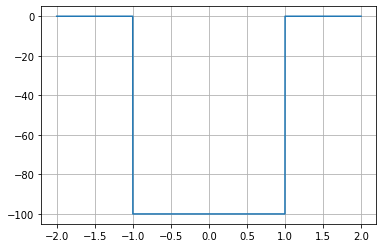

In [109]:
L=1.0
N=10000
well = np.linspace(-L-1 ,L+1.,N)  
potential=[]
for i in range(len(well)):
    potential.append(V(well[i]))

pl.grid()
pl.plot(well, potential)

In [110]:
psi0, psip0 = 1.0, 0.0   # start psi and psi'  at $x=0$.
s=np.array([psi0, psip0])
hbar=1.0  # pick convenient units
m=1.0

def RK4Step(s, x, derivs, dx, E):
    """
    Take a single RK4 step. (our old friend)
    But this time we're integrating in 'x', not 't'.
    """
    dxh=dx/2.0
    f1 = derivs(s, x, E)
    f2 = derivs(s+f1*dxh, x+dxh, E)
    f3 = derivs(s+f2*dxh, x+dxh, E)
    f4 = derivs(s+f3*dx, x+dx, E)
    return s + (f1+2*f2+2*f3+f4)*dx/6.0

def SWE_derivs(s, x, E):
    psi=s[0]
    psip=s[1]
    
    psipp =(2*m/hbar**2)*(V(x)-E)*psi
    return np.array([psip, psipp])

In [111]:
def Integrate(E, startX=0.0, stopX=L, num=N, psi0=1, psip0=0,  results=None):
    """
    E is the test energy.
    results is an option dictionary to store results

    returns: final values of psi and psi_prime 
    """
    s=np.array([psi0, psip0])
    xs = np.linspace(startX, stopX, num)
    dx = xs[1] - xs[0]
    for x in xs:
        s=RK4Step(s, x, SWE_derivs, dx, E)
        if results is not None:
          xvals = results.get('x',[])
          xvals.append(x)
          results['x'] = xvals

          psiVals = results.get('psi',[])
          psiVals.append(s[0])
          results['psi'] = psiVals

          psiPrimeVals = results.get('psip',[])
          psiPrimeVals.append(s[1])
          results['psip'] = psiPrimeVals


    return s

def Integrate_as(E, startX=0.0, stopX=L, num=N, psi0=0, psip0=1,  results=None):
    """
    E is the test energy.
    results is an option dictionary to store results

    returns: final values of psi and psi_prime 
    """
    s=np.array([psi0, psip0])
    xs = np.linspace(startX, stopX, num)
    dx = xs[1] - xs[0]
    if results is not None:
        results['x'] = [xs[0]]
        results['psi'] = [psi0]
        results['psip'] = [psip0]
        
    for x in xs:
        s=RK4Step(s, x, SWE_derivs, dx, E)
        if results is not None:
          xvals = results.get('x',[])
          xvals.append(x)
          results['x'] = xvals

          psiVals = results.get('psi',[])
          psiVals.append(s[0])
          results['psi'] = psiVals

          psiPrimeVals = results.get('psip',[])
          psiPrimeVals.append(s[1])
          results['psip'] = psiPrimeVals


    return s

## Symmetric Case

In [112]:
def integrateAtEnergy(E):
    results = {}
    Integrate(E,0,L,N,1,0,results)
    results2 = {}
    Integrate(E, 3*L, L, N, 1e-30, 0, results2)
    x1 = np.array(results['x'])
    psi1 = np.array(results['psi'])
    psip1 = np.array(results['psip'])
    psi2 = np.array(results2['psi'])
    psip2 = np.array(results2['psip'])
    x2 = np.array(results2['x'])
    psi2rescaled = psi1[-1]*psi2/results2['psi'][-1]
    psip2rescaled = psi1[-1]*psip2/results2['psi'][-1]
    return x1, psi1, psip1, x2, psi2rescaled, psip2rescaled

def diff(E):
    x1, psi1, psip1, x2, psi2, psip2 = integrateAtEnergy(E)
    return psip1[-1] - psip2[-1]

In [113]:
Eigen1 = brentq(diff, -95, -100)
Eigen1

-98.92462525020724

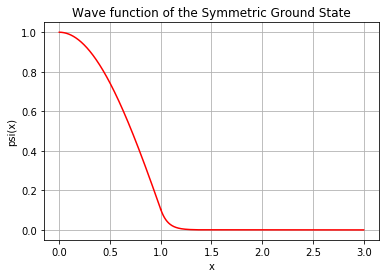

In [114]:
x1, psi1, psip1, x2, psi2, psip2 = integrateAtEnergy(Eigen1)
pl.plot(x1, psi1, 'r-')
pl.plot(x2, psi2, 'r-')
pl.title("Wave function of the Symmetric Ground State")
pl.xlabel("x")
pl.ylabel("psi(x)")
pl.grid()

In [115]:
Eigen2 = brentq(diff, -90, -91)
Eigen2

-90.34081907043928

Text(0, 0.5, 'psi(x)')

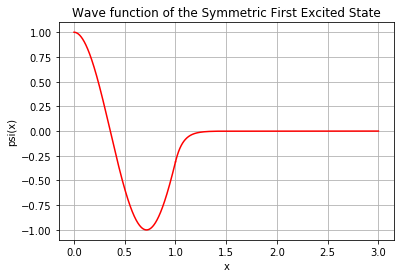

In [116]:
x1, psi1, psip1, x2, psi2, psip2 = integrateAtEnergy(Eigen2)
pl.plot(x1, psi1, 'r-')
pl.plot(x2, psi2, 'r-')
pl.grid()
pl.title("Wave function of the Symmetric First Excited State")
pl.xlabel("x")
pl.ylabel("psi(x)")

In [117]:
Eigen3 = brentq(diff, -70, -85)
Eigen3

-73.28912301831238

Text(0, 0.5, 'psi(x)')

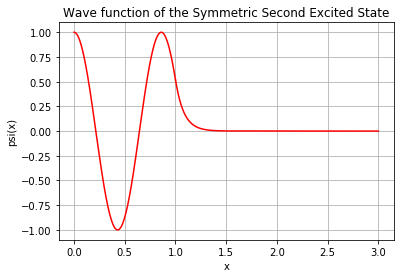

In [118]:
x1, psi1, psip1, x2, psi2, psip2 = integrateAtEnergy(Eigen3)
pl.plot(x1, psi1, 'r-')
pl.plot(x2, psi2, 'r-')
pl.grid()
pl.title("Wave function of the Symmetric Second Excited State")
pl.xlabel("x")
pl.ylabel("psi(x)")

In [119]:
Eigen4 = brentq(diff, -40, -55)
Eigen4

-48.09630735413568

Text(0, 0.5, 'psi(x)')

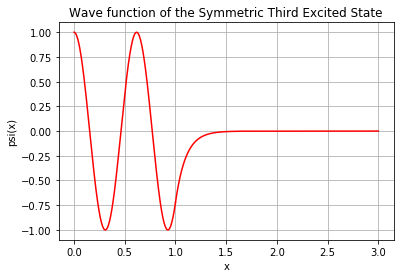

In [120]:
x1, psi1, psip1, x2, psi2, psip2 = integrateAtEnergy(Eigen4)
pl.plot(x1, psi1, 'r-')
pl.plot(x2, psi2, 'r-')
pl.grid()
pl.title("Wave function of the Symmetric Third Excited State")
pl.xlabel("x")
pl.ylabel("psi(x)")

In [121]:
Eigen5 = brentq(diff, -20, -10)
Eigen5

-15.854979189479215

Text(0, 0.5, 'psi(x)')

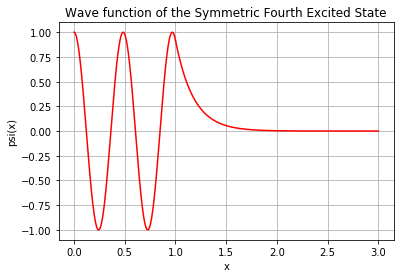

In [122]:
x1, psi1, psip1, x2, psi2, psip2 = integrateAtEnergy(Eigen5)
pl.plot(x1, psi1, 'r-')
pl.plot(x2, psi2, 'r-')
pl.grid()
pl.title("Wave function of the Symmetric Fourth Excited State")
pl.xlabel("x")
pl.ylabel("psi(x)")

In [123]:
print ("Energy eigenvalues for Symmetric case:")
print ("Energy Eigenvalue for n = 1: %5.4f" % Eigen1)
print ("Energy Eigenvalue for n = 2: %5.4f" % Eigen2)
print ("Energy Eigenvalue for n = 3: %5.4f" % Eigen3)
print ("Energy Eigenvalue for n = 4: %5.4f" % Eigen4)
print ("Energy Eigenvalue for n = 5: %5.4f" % Eigen5)

Energy eigenvalues for Symmetric case:
Energy Eigenvalue for n = 1: -98.9246
Energy Eigenvalue for n = 2: -90.3408
Energy Eigenvalue for n = 3: -73.2891
Energy Eigenvalue for n = 4: -48.0963
Energy Eigenvalue for n = 5: -15.8550


## Asymmetric case

In [124]:
def integrateAtEnergy_as(E):
    results = {}
    Integrate_as(E,0,L,N,0,1,results)
    results2 = {}
    Integrate_as(E, 3*L, L, N, 0, 1e-30, results2)
    x1 = np.array(results['x'])
    psi1 = np.array(results['psi'])
    psip1 = np.array(results['psip'])
    psi2 = np.array(results2['psi'])
    psip2 = np.array(results2['psip'])
    x2 = np.array(results2['x'])
    psi2rescaled = psi1[-1]*psi2/results2['psi'][-1]
    psip2rescaled = psi1[-1]*psip2/results2['psi'][-1]
    return x1, psi1, psip1, x2, psi2rescaled, psip2rescaled

def diff_as(E):
    x1, psi1, psip1, x2, psi2, psip2 = integrateAtEnergy_as(E)
    return psip1[-1] - psip2[-1]

In [125]:
Eigen_as1 = brentq(diff_as, -95, -96)
Eigen_as1

-95.70162602020629

Text(0, 0.5, 'psi(x)')

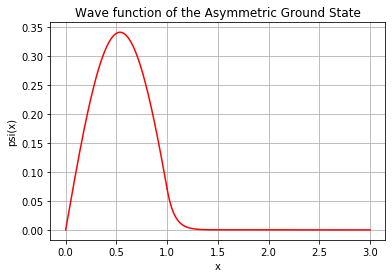

In [126]:
x1, psi1, psip1, x2, psi2, psip2 = integrateAtEnergy_as(Eigen_as1)
pl.plot(x1, psi1, 'r-')
pl.plot(x2, psi2, 'r-')
pl.grid()
pl.title("Wave function of the Asymmetric Ground State")
pl.xlabel("x")
pl.ylabel("psi(x)")

In [127]:
Eigen_as2 = brentq(diff_as, -84, -82)
Eigen_as2

-82.86020355285109

Text(0, 0.5, 'psi(x)')

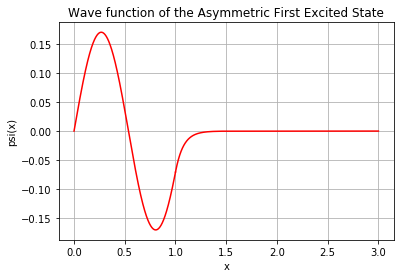

In [128]:
x1, psi1, psip1, x2, psi2, psip2 = integrateAtEnergy_as(Eigen_as2)
pl.plot(x1, psi1, 'r-')
pl.plot(x2, psi2, 'r-')
pl.grid()
pl.title("Wave function of the Asymmetric First Excited State")
pl.xlabel("x")
pl.ylabel("psi(x)")

In [129]:
Eigen_as3 = brentq(diff_as, -60, -64)
Eigen_as3

-61.67472921931975

Text(0, 0.5, 'psi(x)')

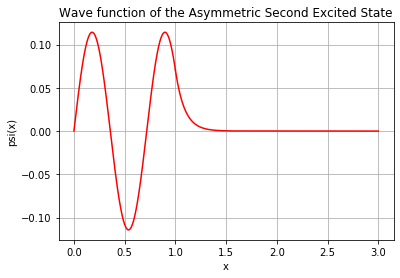

In [130]:
x1, psi1, psip1, x2, psi2, psip2 = integrateAtEnergy_as(Eigen_as3)
pl.plot(x1, psi1, 'r-')
pl.plot(x2, psi2, 'r-')
pl.grid()
pl.title("Wave function of the Asymmetric Second Excited State")
pl.xlabel("x")
pl.ylabel("psi(x)")

In [131]:
Eigen_as4 = brentq(diff_as, -32, -36)
Eigen_as4

-32.70310679762348

Text(0, 0.5, 'psi(x)')

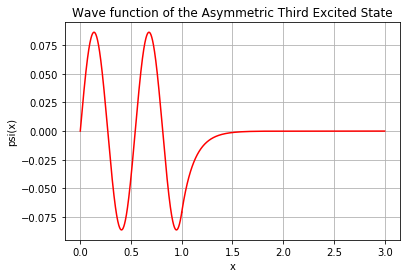

In [132]:
x1, psi1, psip1, x2, psi2, psip2 = integrateAtEnergy_as(Eigen_as4)
pl.plot(x1, psi1, 'r-')
pl.plot(x2, psi2, 'r-')
pl.grid()
pl.title("Wave function of the Asymmetric Third Excited State")
pl.xlabel("x")
pl.ylabel("psi(x)")

In [133]:
print ("Energy eigenvalues for Asymmetric case:")
print ("Energy Eigenvalue for n = 1: %5.4f" % Eigen_as1)
print ("Energy Eigenvalue for n = 2: %5.4f" % Eigen_as2)
print ("Energy Eigenvalue for n = 3: %5.4f" % Eigen_as3)
print ("Energy Eigenvalue for n = 4: %5.4f" % Eigen_as4)

Energy eigenvalues for Asymmetric case:
Energy Eigenvalue for n = 1: -95.7016
Energy Eigenvalue for n = 2: -82.8602
Energy Eigenvalue for n = 3: -61.6747
Energy Eigenvalue for n = 4: -32.7031


### Analytical Solution

In [134]:
z0 = L*np.sqrt(-2*m*V0)/hbar; z0

14.142135623730951

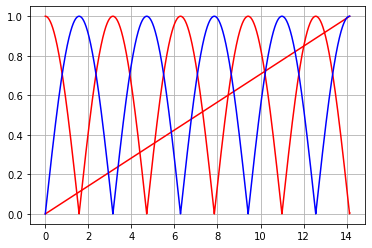

In [135]:
z = np.linspace(0,z0,N)
pl.plot(z,z/z0,'r-')
pl.plot(z,abs(np.cos(z)),'r-')
pl.plot(z,abs(np.sin(z)),'b-')
pl.grid()

In [136]:
k0 = brentq(lambda z: np.cos(z) - z/z0, 1,2 ); k0

1.4668849966730226

In [137]:
E1 = V0 + (hbar*k0)**2/(2*m)
E1

-98.9241242032678

In [138]:
k1 = brentq(lambda z: np.sin(z) - z/z0, 2.5,3 ); k1

2.9327033818989654

In [139]:
E_as1 = V0 + (hbar*k1)**2/(2*m)
E_as1

-95.69962543689918

In [140]:
k2 = brentq(lambda z: abs(np.cos(z)) - z/z0, 4,4.7 ); k2

4.3962866150340565

In [141]:
E2 = V0 + (hbar*k2)**2/(2*m)
E2

-90.3363319992362

In [142]:
k3 = brentq(lambda z: abs(np.sin(z)) - z/z0, 5.5,6.1 ); k3

5.856233423716016

In [143]:
E_as2 = V0 + (hbar*k3)**2/(2*m)
E_as2

-82.8522650434757

In [144]:
k4 = brentq(lambda z: abs(np.cos(z)) - z/z0, 7,8 ); k4

7.310703614472121

In [145]:
E3 = V0 + (hbar*k4)**2/(2*m)
E3

-73.27680633067213

In [146]:
k5 = brentq(lambda z: abs(np.sin(z)) - z/z0, 8.5,9 ); k5

8.757034307665888

In [147]:
E_as3 = V0 + (hbar*k5)**2/(2*m)
E_as3

-61.657175067181306

In [148]:
k6 = brentq(lambda z: abs(np.cos(z)) - z/z0, 10,11 ); k6

10.190899214952116

In [149]:
E4 = V0 + (hbar*k6)**2/(2*m)
E4

-48.07278659534417

In [150]:
k7 = brentq(lambda z: abs(np.sin(z)) - z/z0, 11.5,12 ); k7

11.604034486938492

In [151]:
E_as4 = V0 + (hbar*k7)**2/(2*m)
E_as4

-32.67319181297107

In [152]:
k8 = brentq(lambda z: abs(np.cos(z)) - z/z0, 12.5,14 ); k8

12.975416979484846

In [153]:
E5 = V0 + (hbar*k8)**2/(2*m)
E5

-15.819277104248172

In [154]:
print ("Analytical Symmetrical Energy Eigenvalues:")
print ("Energy Eigenvalue for n = 1: %5.4f" % E1)
print ("Energy Eigenvalue for n = 2: %5.4f" % E2)
print ("Energy Eigenvalue for n = 3: %5.4f" % E3)
print ("Energy Eigenvalue for n = 4: %5.4f" % E4)
print ("Energy Eigenvalue for n = 5: %5.4f" % E5)

Analytical Symmetrical Energy Eigenvalues:
Energy Eigenvalue for n = 1: -98.9241
Energy Eigenvalue for n = 2: -90.3363
Energy Eigenvalue for n = 3: -73.2768
Energy Eigenvalue for n = 4: -48.0728
Energy Eigenvalue for n = 5: -15.8193


In [155]:
print ("Analytical Asymmetrical Energy Eigenvalues:")
print ("Energy Eigenvalue for n = 1: %5.4f" % E_as1)
print ("Energy Eigenvalue for n = 2: %5.4f" % E_as2)
print ("Energy Eigenvalue for n = 3: %5.4f" % E_as3)
print ("Energy Eigenvalue for n = 4: %5.4f" % E_as4)

Analytical Asymmetrical Energy Eigenvalues:
Energy Eigenvalue for n = 1: -95.6996
Energy Eigenvalue for n = 2: -82.8523
Energy Eigenvalue for n = 3: -61.6572
Energy Eigenvalue for n = 4: -32.6732


### Comparing Root-finding and Analytical results for Symmetric case
|Bound State   | Root-finding Method Results  | Analytical Results  |  
|---|---|---|
| 1  | -98.9246  | -98.9241  |   
| 2  | -90.3408  | -90.3363  |  
| 3  | -73.2891  | -73.2768  | 
| 4  | -48.0963  | -48.0728  |
| 5  | -15.8550  | -15.8193  |

One can see that the greatest difference in result is 3.57%

### Comparing Root-finding and Analytical results for Asymmetric case
|Bound State   | Root-finding Method Results  | Analytical Results  |  
|---|---|---|
| 1  | -95.7016  | -95.6996 |   
| 2  | -82.8602  | -82.8523 |  
| 3  | -61.6747  | -61.6572 | 
| 4  | -32.7031  | -32.6732 |

One can see that the greatest difference in result is 2.99%

## Conclusion
In this final project, i used root finding techniques to find Energy Eigenvalues for both Symmetrical and Asymmetrical cases of a Finite square well. These values were compared to the ones obtained from solving the transcedental equations. Solving for a finite square well with $V_0$ = -100, seven energy eigenstates and values were found comprising of both Symmetric and Asymmetric cases. They were: -98.92, -95.70, -90.34, -82.85, -73.28, -61.66, -48.07, -32.67, -15.82.